Optimal k: 2
Mean Squared Error: 0.0016370980788842676
R^2 Score: 0.9914332653732936


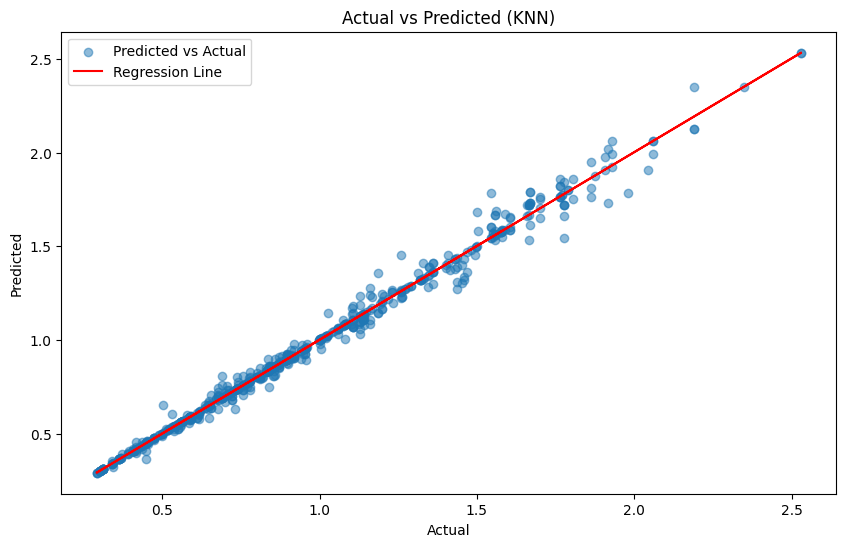

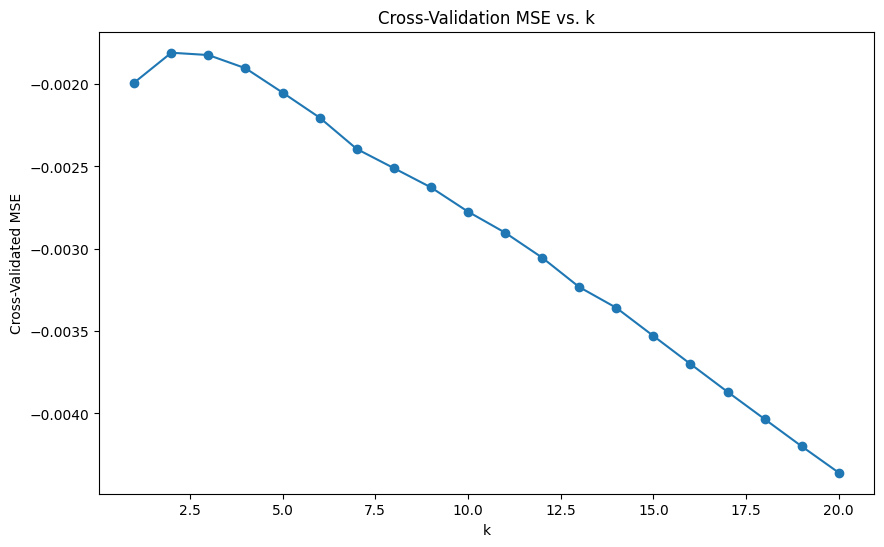

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('final.csv', encoding='cp949')
df.fillna(method='ffill', inplace=True)  # Fill missing values using forward fill

# Convert '단계' column to numerical values
stage_mapping = {'안정': 1, '양호': 2, '주의': 3, '위험': 4}
df['단계'] = df['단계'].map(stage_mapping)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['시점', '자치구역번호', '소멸위험지수']))

# Split the dataset into features and target variable
X = scaled_features
y = df['소멸위험지수']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a range of k values to test
k_values = range(1, 21)
cv_scores = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Select the k value with the smallest MSE
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')

# Train the KNN model with the optimal k value
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add a regression line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Regression Line')

plt.title('Actual vs Predicted (KNN)')
plt.legend()
plt.show()

# Visualization of cross-validated MSE vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validation MSE vs. k')
plt.show()
